In [1]:
import ROOT as rt

rt.gStyle.SetOptStat(0)

Welcome to JupyROOT 6.26/10


In [2]:
c = rt.TCanvas("c", "c", 800, 600)
c.SetRightMargin(0.05)
c.SetLeftMargin(0.10)
c.SetTopMargin(0.05)

Info in <TCanvas::Print>: pdf file figures/lambda_mass_dist_0_20.pdf has been created
Info in <TCanvas::Print>: pdf file figures/lambda_mass_dist_20_50.pdf has been created
Info in <TCanvas::Print>: pdf file figures/lambda_mass_dist_50_80.pdf has been created
Info in <TCanvas::Print>: pdf file figures/lambda_mass_dist_0_20_lowpt.pdf has been created
Info in <TCanvas::Print>: pdf file figures/lambda_mass_dist_20_50_lowpt.pdf has been created
Info in <TCanvas::Print>: pdf file figures/lambda_mass_dist_50_80_lowpt.pdf has been created
Info in <TCanvas::Print>: pdf file figures/lambda_mass_dist_0_20_highpt.pdf has been created
Info in <TCanvas::Print>: pdf file figures/lambda_mass_dist_20_50_highpt.pdf has been created
Info in <TCanvas::Print>: pdf file figures/lambda_mass_dist_50_80_highpt.pdf has been created


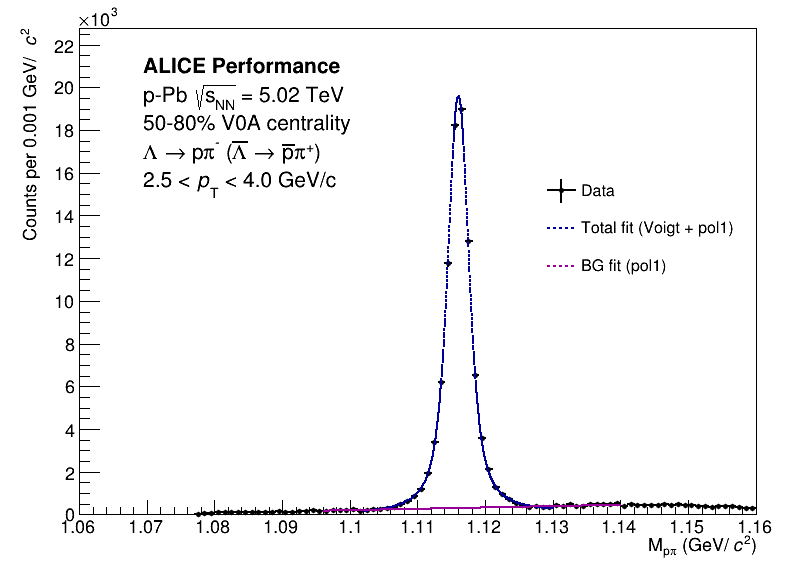

In [15]:
for pt_bin in ["central", "low", "high"]:
    for cent_bin in [0, 20, 50]:

        if pt_bin == "central":
            v0_input_file = rt.TFile("tmp.root")
        elif pt_bin == "low":
            v0_input_file = rt.TFile("tmp_low.root")
        elif pt_bin == "high":
            v0_input_file = rt.TFile("tmp_high.root")

        if cent_bin == 0:
            lambda_mass_dist = v0_input_file.Get("lambda_mass_dist_0_20").Clone("tmp")
            lambda_mass_fit = v0_input_file.Get("lambda_mass_fit_0_20")
            lambda_mass_bg_fit = v0_input_file.Get("bg_fit_0_20")
        elif cent_bin == 20:
            lambda_mass_dist = v0_input_file.Get("lambda_mass_dist_20_50").Clone("tmp")
            lambda_mass_fit = v0_input_file.Get("lambda_mass_fit_20_50")
            lambda_mass_bg_fit = v0_input_file.Get("bg_fit_20_50")
        elif cent_bin == 50:
            lambda_mass_dist = v0_input_file.Get("lambda_mass_dist_50_80").Clone("tmp")
            lambda_mass_fit = v0_input_file.Get("lambda_mass_fit_50_80")
            lambda_mass_bg_fit = v0_input_file.Get("bg_fit_50_80")
        else:
            print("Invalid centrality bin")

        lambda_mass_dist.SetTitle("")
        lambda_mass_dist.GetYaxis().SetMaxDigits(3)
        lambda_mass_dist.GetXaxis().SetTitle("M_{p#pi} (GeV/#it{c}^{2})")
        lambda_mass_dist.GetYaxis().SetTitle("Counts per 0.001 GeV/#it{c}^{2}")
        lambda_mass_dist.GetYaxis().SetRangeUser(0, 1.2*lambda_mass_dist.GetMaximum())

        lambda_mass_dist.SetLineColor(rt.kBlack)
        lambda_mass_dist.SetLineWidth(2)
        lambda_mass_dist.SetMarkerStyle(20)
        lambda_mass_dist.SetMarkerSize(0.5)

        lambda_mass_fit.SetLineColor(rt.kBlue + 2)
        lambda_mass_fit.SetLineWidth(2)
        lambda_mass_fit.SetLineStyle(rt.kDashed)

        lambda_mass_bg_fit.SetLineColor(rt.kMagenta + 2)
        lambda_mass_bg_fit.SetLineWidth(2)
        lambda_mass_bg_fit.SetLineStyle(rt.kDashed)

        lambda_mass_dist.Draw()
        lambda_mass_fit.Draw("SAME")
        lambda_mass_bg_fit.Draw("SAME")

        legend_y_start = 0.5
        legend_x_start = 0.68
        legend_x_width = 0.2
        legend_y_width = 0.2
        legend_y_finish = legend_y_start + legend_y_width
        legend_x_finish = legend_x_start + legend_x_width

        mass_legend = rt.TLegend(legend_x_start, legend_y_start, legend_x_finish, legend_y_finish)
        mass_legend.SetTextSize(0.03)
        mass_legend.SetBorderSize(0)
        mass_legend.SetFillStyle(0)
        mass_legend.AddEntry(lambda_mass_dist, "Data", "lep")
        mass_legend.AddEntry(lambda_mass_fit, "Total fit (Voigt + pol1)", "l")
        mass_legend.AddEntry(lambda_mass_bg_fit, "BG fit (pol1)", "l")
        mass_legend.Draw("SAME")
            
        label_y_start = 0.9
        label_x_start = 0.18
        label_text_space = 0.05
        alice_data_label = rt.TLatex()
        alice_data_label.SetNDC()
        alice_data_label.SetTextSize(0.04)
        alice_data_label.SetTextAlign(13)
        alice_data_label.DrawLatex(label_x_start, label_y_start, "ALICE Performance")
        alice_data_label.DrawLatex(label_x_start, label_y_start - label_text_space, "#bf{p-Pb #sqrt{s_{NN}} = 5.02 TeV}")
        if cent_bin == 0:
            alice_data_label.DrawLatex(label_x_start, label_y_start - 2*label_text_space, "#bf{0-20% V0A centrality}")
        elif cent_bin == 20:
            alice_data_label.DrawLatex(label_x_start, label_y_start - 2*label_text_space, "#bf{20-50% V0A centrality}")
        elif cent_bin == 50:
            alice_data_label.DrawLatex(label_x_start, label_y_start - 2*label_text_space, "#bf{50-80% V0A centrality}")
        alice_data_label.DrawLatex(label_x_start, label_y_start - 3*label_text_space + 0.01, "#bf{#Lambda #rightarrow p#pi^{-} (#bar{#Lambda} #rightarrow #bar{p}#pi^{+})}")
        if pt_bin == "central":
            alice_data_label.DrawLatex(label_x_start, label_y_start - 4*label_text_space, "#bf{2.0 < #it{p}_{T} < 4.0 GeV/c}")
        elif pt_bin == "low":
            alice_data_label.DrawLatex(label_x_start, label_y_start - 4*label_text_space, "#bf{1.5 < #it{p}_{T} < 2.5 GeV/c}")
        elif pt_bin == "high":
            alice_data_label.DrawLatex(label_x_start, label_y_start - 4*label_text_space, "#bf{2.5 < #it{p}_{T} < 4.0 GeV/c}")

        c.Draw()
        if pt_bin == "central":
            if cent_bin == 0:
                c.SaveAs("figures/lambda_mass_dist_0_20.pdf")
            elif cent_bin == 20:
                c.SaveAs("figures/lambda_mass_dist_20_50.pdf")
            elif cent_bin == 50:
                c.SaveAs("figures/lambda_mass_dist_50_80.pdf")
        elif pt_bin == "low":
            if cent_bin == 0:
                c.SaveAs("figures/lambda_mass_dist_0_20_lowpt.pdf")
            elif cent_bin == 20:
                c.SaveAs("figures/lambda_mass_dist_20_50_lowpt.pdf")
            elif cent_bin == 50:
                c.SaveAs("figures/lambda_mass_dist_50_80_lowpt.pdf")
        elif pt_bin == "high":
            if cent_bin == 0:
                c.SaveAs("figures/lambda_mass_dist_0_20_highpt.pdf")
            elif cent_bin == 20:
                c.SaveAs("figures/lambda_mass_dist_20_50_highpt.pdf")
            elif cent_bin == 50:
                c.SaveAs("figures/lambda_mass_dist_50_80_highpt.pdf")

In [7]:
print((1.16 - 1.06)/lambda_mass_dist.GetNbinsX())

0.0009999999999999987
